# Anova for our analysis
We run an anova to compare ethnicities and emotions, each combination of those. We have to leave out the asians unfortunately:(

# Load in packages 

In [9]:
import numpy as np
import mne
from pathlib import Path
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import mixedlm

## Load in the data and epochs

In [10]:
# ALL FROM LAURAS GROUP LEVEL ANALYSIS
# Define the directory
data_path = Path("/Users/lina/Documents/GitHub/ore_EEG/epochs")

# Initialize an empty list to store epochs objects
all_epochs = []

# Iterate over your saved files and load them into epochs objects
for participant in ["own_sub1", "own2_ah"]:
    # Load epochs data from each file
    epochs = mne.read_epochs(data_path / f"epochs_{participant}-epo.fif", verbose=False, preload=True)
    
    # Only keep EEG channels
    epochs.pick_types(eeg=True)
    
    # Append the loaded epochs object to the list
    all_epochs.append(epochs)

# Check the type and length of the list of epochs objects
print(type(all_epochs))  # We have now created a list of epochs objects
print(len(all_epochs))    # We have 2 epochs objects in the list

# Access the first epochs object in the list
print(type(all_epochs[0]))  # We can access the first epochs object in the list which is an Epochs object

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
<class 'list'>
2
<class 'mne.epochs.EpochsFIF'>


## Define channels and time used for the anova

In [11]:
# chosen channels for anova
picks = ["Oz", "P7"] # just random 

# time window for anova
tmin = 0.13
tmax = 0.21

## Define Factors

In [12]:
# Labels for conditions
ethnicity_labels = ['white', 'black']
emotion_labels = ['happy', 'neutral', 'sad']
data = []

In [13]:
# We want combinations of ethnicity and emotion, so we loop over all of the epochs conditions
for i, epochs in enumerate(all_epochs):
    for ethnicity in ethnicity_labels:
        for emotion in emotion_labels:
            current_epochs = epochs[f'{emotion}/{ethnicity}']
            data_current = current_epochs.get_data(picks=picks, tmin=tmin, tmax=tmax)
            
            # Find the minimum peak value in the specified time window for each epoch
            data_min = np.min(data_current, axis=2).mean(axis=0).min()
            
            # Append the minimum peak data, labels, and subject ID to the list
            data.append([i, ethnicity, emotion, data_min])

# Make a dataframe
df = pd.DataFrame(data, columns=['Subject', 'Ethnicity', 'Emotion', 'MinPeak'])


# Perform anova

In [14]:
# Fit model with subject as group level
model = mixedlm('MinPeak ~ C(Ethnicity) * C(Emotion)', data=df, groups=df['Subject'])
anova_result = model.fit()

# Print the summary of the model
print(anova_result.summary().as_latex())

\begin{table}
\caption{Mixed Linear Model Regression Results}
\label{}
\begin{center}
\begin{tabular}{llll}
\hline
Model:            & MixedLM & Dependent Variable: & MinPeak  \\
No. Observations: & 12      & Method:             & REML     \\
No. Groups:       & 2       & Scale:              & 0.0000   \\
Min. group size:  & 6       & Log-Likelihood:     & 75.6339  \\
Max. group size:  & 6       & Converged:          & Yes      \\
Mean group size:  & 6.0     &                     &          \\
\hline
\end{tabular}
\end{center}

\begin{center}
\begin{tabular}{lrrrrrr}
\hline
                                            &  Coef. & Std.Err. &      z & P$> |$z$|$ & [0.025 & 0.975]  \\
\hline
Intercept                                   & -0.000 &    0.000 & -5.025 &       0.000 & -0.000 & -0.000  \\
C(Ethnicity)[T.white]                       & -0.000 &    0.000 & -0.574 &       0.566 & -0.000 &  0.000  \\
C(Emotion)[T.neutral]                       & -0.000 &    0.000 & -1.496 &       0.135

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_4526/1008131377.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = condition_epochs.get_data()
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_4526/1008131377.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = condition_epochs.get_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_4526/1008131377.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = condition_epochs.get_data()
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_4526/1008131377.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = condition_epochs.get_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_4526/1008131377.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = condition_epochs.get_data()
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_4526/1008131377.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = condition_epochs.get_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_4526/1008131377.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = condition_epochs.get_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_4526/1008131377.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = condition_epochs.get_data()
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_4526/1008131377.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = condition_epochs.get_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_4526/1008131377.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = condition_epochs.get_data()
/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_4526/1008131377.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = condition_epochs.get_data()


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/var/folders/sr/t35nvgpn1m9d3bl1dbwrj4300000gn/T/ipykernel_4526/1008131377.py:16: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = condition_epochs.get_data()


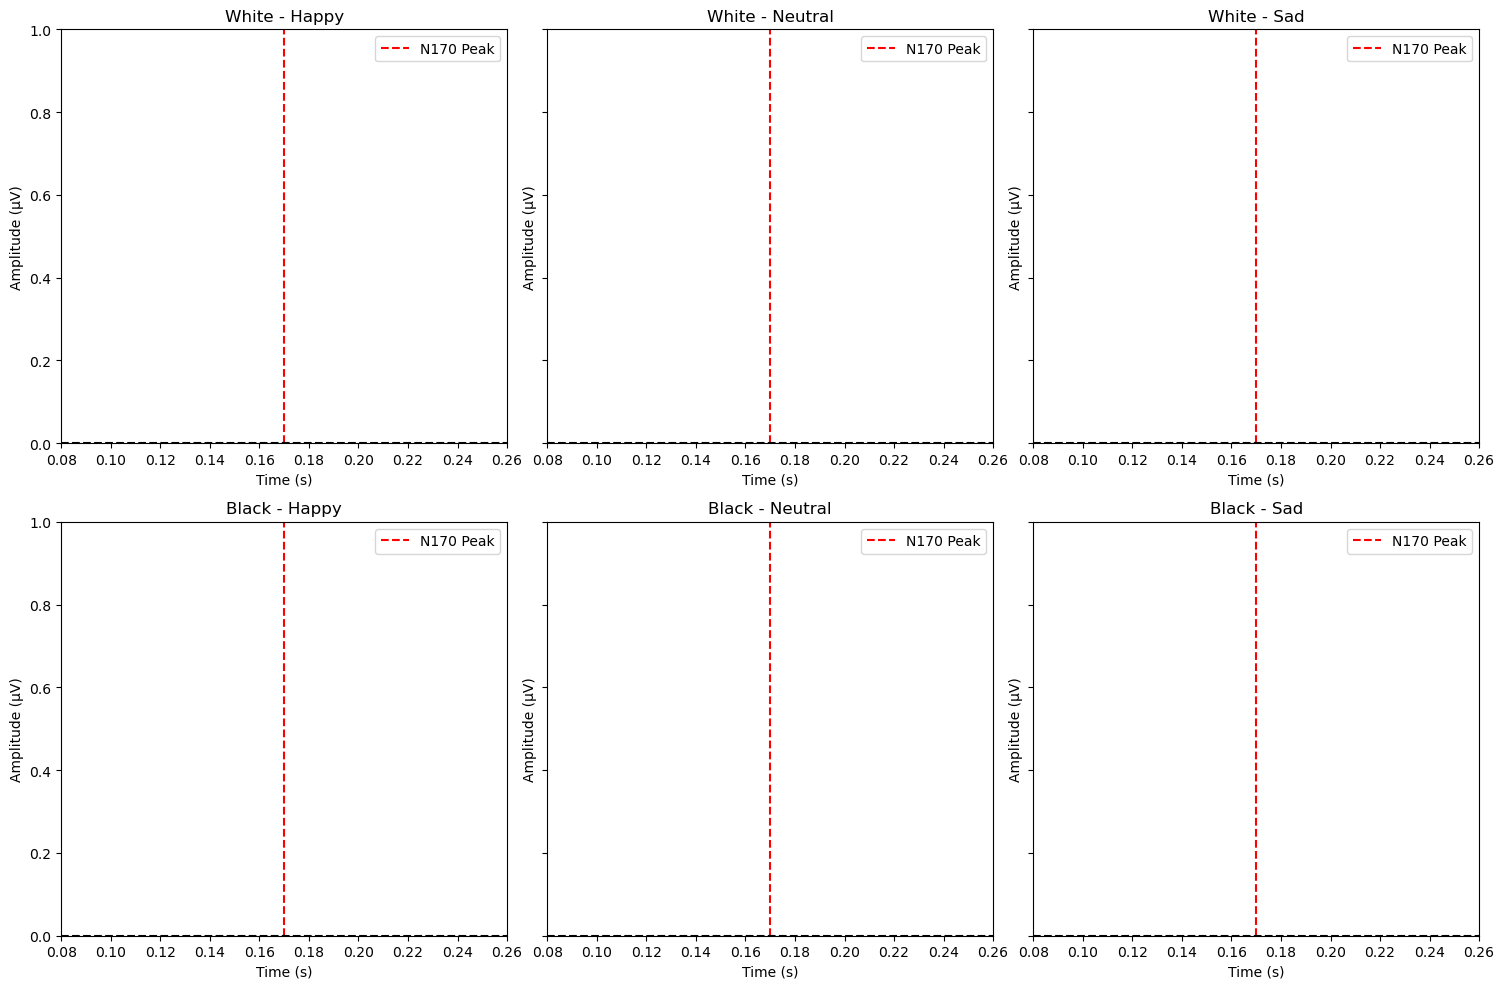

In [16]:

# Initialize a dictionary to store the averaged data for plotting
averaged_data = {ethnicity: {emotion: [] for emotion in emotion_labels} for ethnicity in ethnicity_labels}

# Extract and average data
for epochs in all_epochs:
    for ethnicity in ethnicity_labels:
        for emotion in emotion_labels:
            # Select epochs for the specific condition
            condition_epochs = epochs[f"{ethnicity}/{emotion}"].copy()
            condition_epochs.pick_channels(picks)
            
            # Crop to the specified time window
            condition_epochs.crop(tmin=tmin, tmax=tmax)
            
            # Get the data and average it
            data = condition_epochs.get_data()
            average = data.mean(axis=0)  # Average across epochs
            
            # Store the average data
            averaged_data[ethnicity][emotion].append(average)

# Combine data across participants and compute grand average
grand_averaged_data = {ethnicity: {emotion: np.mean(averaged_data[ethnicity][emotion], axis=0) 
                                   for emotion in emotion_labels} 
                       for ethnicity in ethnicity_labels}

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

for i, ethnicity in enumerate(ethnicity_labels):
    for j, emotion in enumerate(emotion_labels):
        ax = axes[i, j]
        for pick in picks:
            # Check if the channel is in the epoch's channels
            if pick in all_epochs[0].info['ch_names']:
                ch_index = all_epochs[0].info['ch_names'].index(pick)
                times = all_epochs[0].times
                data = grand_averaged_data[ethnicity][emotion]
                
                # Ensure that the data has the right dimensions
                if ch_index < data.shape[0]:
                    ax.plot(times, data[ch_index], label=pick)
        
        ax.set_title(f'{ethnicity.capitalize()} - {emotion.capitalize()}')
        ax.axvline(x=0.17, color='r', linestyle='--', label='N170 Peak')
        ax.axhline(y=0, color='k', linestyle='--')
        ax.set_xlim(tmin - 0.05, tmax + 0.05)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Amplitude (µV)')
        ax.legend()

plt.tight_layout()
plt.show()